# Singfake Dataset

*In this notebook, the logistic regression, k-nearest neighbor, decision tree and Naive Bayes models were used for the detection of AI generated audio through investigating the relationship between video metadata,user metadata and audio features on the respective sample. The data for this notebook was collected through the use of BiliBili's API,Librosa and wave libraries. For this notebook 0 denotes real audio and 1 denotes fake audio.*

### Logistic Regression Implementation

In [48]:
import pandas as pd

col_names = ['bonafide_or_spoof','set','language','singer','title','url','views','likes','comments','user_id','username','subscribers','num_channels','sample_width','frame_rate','num_frames','audio_time','avg_zero_cross_rate','avg_rms','avg_spect_cent','avg_tempo','avg_db_inten','avg_flatness','avg_contrast','avg_harmonic_ratio']

pdata = pd.read_csv('singfake_bilibili_audio_features.csv', skiprows=1, names=col_names)

pdata.head(10)

,bonafide_or_spoof,set,language,singer,title,url,views,likes,comments,user_id,...,num_frames,audio_time,avg_zero_cross_rate,avg_rms,avg_spect_cent,avg_tempo,avg_db_inten,avg_flatness,avg_contrast,avg_harmonic_ratio
0,0,Validation,Spanish,G.E.M.,【4K超清 | 官方MV】邓紫棋《Un Momento》西语版 | Revelación｜G...,https://www.bilibili.com/video/BV1HP411y7mb/?s...,51899,4596,140,1.889545e+09,...,11433984,238.208000,0.056634,0.201527,1490.786332,151.999081,-54.358418,0.021109,26.612757,-1.720000e-05
1,0,T01,Mandarin,Stefanie_Sun,孙燕姿.[爱情证书].MV.官方字幕修复版 1080p,https://www.bilibili.com/video/BV1nb4y1U7Jj/?s...,31540,392,53,3.848313e+08,...,11326464,256.835918,0.079587,0.173337,1991.927239,123.046875,-45.372272,0.026083,25.385115,4.440000e-07
2,0,Training,Mandarin,Mao_Buyi,【毛不易】毛不易精选歌曲合集（带歌词 分集播放）《消愁》《像我这样的人》《平凡的一天》,https://www.bilibili.com/video/BV11M411n7TC/?s...,938489,7578,222,3.493120e+15,...,7575552,171.781225,0.081156,0.087923,1894.589182,123.046875,-49.199482,0.012826,24.683180,-2.440000e-08
3,0,T02,Mandarin,Li_Jian,李健-贝加尔湖畔 (《无心法师》网络剧插曲)(蓝光),https://www.bilibili.com/video/BV1GS4y1Y7u7?p=...,24157,476,23,3.591141e+07,...,10289152,233.314104,0.073901,0.078857,1848.049073,123.046875,-52.704056,0.006847,26.024776,-1.210000e-06
4,0,Training,Mandarin,Hebe_Tien,田馥甄《演员》,https://www.bilibili.com/video/BV1ts411a7m1/?s...,173701,961,206,7.149378e+07,...,12132352,275.110023,0.075524,0.079169,1845.319544,184.570312,-42.717655,0.009434,23.940943,-1.190000e-05
5,0,Training,Mandarin,Hebe_Tien,懸日,https://www.bilibili.com/video/BV1ja4y147Wr?p=20,12402,92,4,3.870518e+08,...,11736064,266.123900,0.056561,0.074131,1384.318999,161.499023,-54.003551,0.008710,25.450700,9.360000e-07
6,0,Training,Mandarin,Stefanie_Sun,天使的指纹-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=...,3335891,28129,1038,3.585944e+08,...,9394176,213.019864,0.062797,0.153191,1620.525750,129.199219,-51.298046,0.007306,26.982263,-2.470000e-06
7,0,Training,Japanese,Kenshi_Yonezu,クランベリーとパンケーキ,https://www.bilibili.com/video/BV12R4y1A75y?p=12,79299,1223,36,4.183923e+08,...,9290752,210.674648,0.070855,0.307621,1989.785201,86.132812,-39.818172,0.019373,22.436281,2.010000e-07
8,0,T01,Mandarin,Stefanie_Sun,银泰-孙燕姿,https://www.bilibili.com/video/BV1J841177n3?p=...,3335972,28129,1038,3.585944e+08,...,9336832,211.719547,0.052835,0.123037,1273.097371,151.999081,-54.227051,0.003310,27.618330,-6.120000e-07
9,0,Validation,Mandarin,The_Landlord's_Cat,房东的猫翻唱鹿先森乐队歌曲《春风十里》，真是好听啊！,https://www.bilibili.com/video/BV1jf4y1B758/?s...,1116699,11527,225,3.544964e+08,...,12379136,280.706032,0.051493,0.089944,1282.568374,135.999178,-59.832489,0.023732,27.167621,-7.660000e-08


In [49]:
print(pdata.dtypes)

bonafide_or_spoof        int64
set                     object
language                object
singer                  object
title                   object
url                     object
views                    int64
likes                    int64
comments                 int64
user_id                float64
username                object
subscribers              int64
num_channels             int64
sample_width             int64
frame_rate               int64
num_frames               int64
audio_time             float64
avg_zero_cross_rate    float64
avg_rms                float64
avg_spect_cent         float64
avg_tempo              float64
avg_db_inten           float64
avg_flatness           float64
avg_contrast           float64
avg_harmonic_ratio     float64
dtype: object


In [50]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

feat_col = ['views','likes','comments','subscribers','frame_rate','num_frames','audio_time','avg_zero_cross_rate','avg_rms','avg_spect_cent','avg_tempo','avg_db_inten','avg_flatness','avg_contrast','avg_harmonic_ratio']

feat_audio = ['frame_rate','num_frames','audio_time','avg_zero_cross_rate','avg_rms','avg_spect_cent','avg_tempo','avg_db_inten','avg_flatness','avg_contrast','avg_harmonic_ratio']

feat_mix = ['views','likes','comments','subscribers','num_frames','audio_time','avg_zero_cross_rate','avg_rms','avg_spect_cent','avg_tempo','avg_flatness']

X = pdata[feat_col] 
y = pdata.bonafide_or_spoof



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [52]:
print(len(X_train))
print(len(y_train))

30
30


In [53]:
print(y_train)

26    0
16    0
24    0
55    1
11    0
32    1
53    1
41    1
37    1
29    0
44    1
1     0
21    0
2     0
47    1
39    1
35    1
23    0
49    1
10    0
22    0
18    0
59    1
20    0
7     0
42    1
14    0
28    0
51    1
38    1
Name: bonafide_or_spoof, dtype: int64


In [54]:
print(X_train)

      views   likes  comments  subscribers  frame_rate  num_frames  \
26    79299    1223        36        79871       44100    12108800   
16    79299    1223        36        79871       44100    10540032   
24   863954    8058       205          974       44100    12448768   
55    23568     262        59         5806       44100    12986368   
11    56464     579        28        43680       48000    15316992   
32     5861     144        30         9347       44100    14075904   
53     2132      35         8          576       44100    10414080   
41      469       9         0          576       44100    10626048   
37   207752    6403       320         1226       44100    10639360   
29   107807    4425       249      1504507       48000    13417472   
44   321147    7996       412       127753       48000    12093440   
1     31540     392        53         3373       44100    11326464   
21     8327     157        45         3945       44100    11446272   
2    938489    7578 

In [55]:
lrmodel = LogisticRegression(max_iter=3000,random_state=42,solver='liblinear')

lrmodel.fit(X_train, y_train)

y_pred = lrmodel.predict(X_test)
y_pred 

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1])

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.76      0.81      0.79        16

    accuracy                           0.77        30
   macro avg       0.77      0.76      0.76        30
weighted avg       0.77      0.77      0.77        30



In [57]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[10,  4],
       [ 3, 13]])

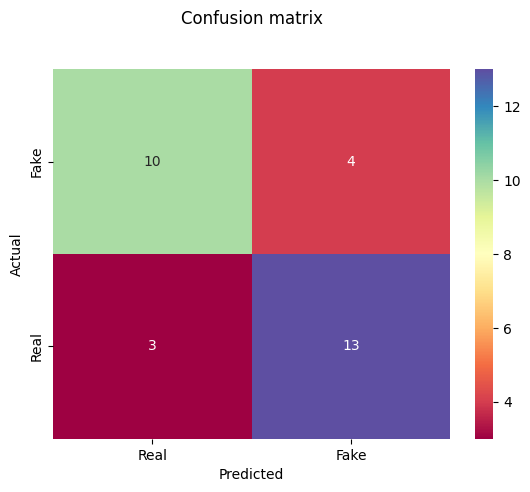

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Renders the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=sns.color_palette("Spectral", as_cmap=True) ,fmt='g',xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.ylabel('Actual') #Labels the Y axis as Actual
plt.xlabel('Predicted') #Labels the X axis as Predicted
plt.show()

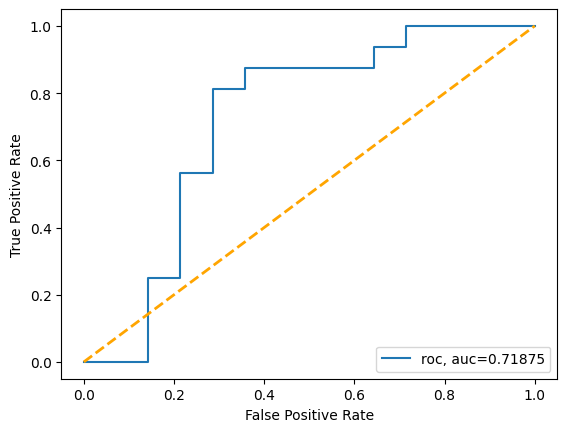

In [59]:
y_pred_proba = lrmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposratelr, trueposratelr, _ = metrics.roc_curve(y_test,  y_pred_proba) #Gets the false positive rate and true positive rate
auclr = metrics.roc_auc_score(y_test, y_pred_proba) #Calculates AUC scaore
plt.plot(falseposratelr,trueposratelr,label="roc, auc="+str(auclr)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')#Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Conclusion Logistic Regression

*The Logistic Regression model yield an accuracy of 0.766 with and f1-score of 0.74 for real audios and 0.79 for fake audios and an ACU value of 0.719. This shows that this model can dectect the AI generated audios relatively well.*

## K-Nearest Neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

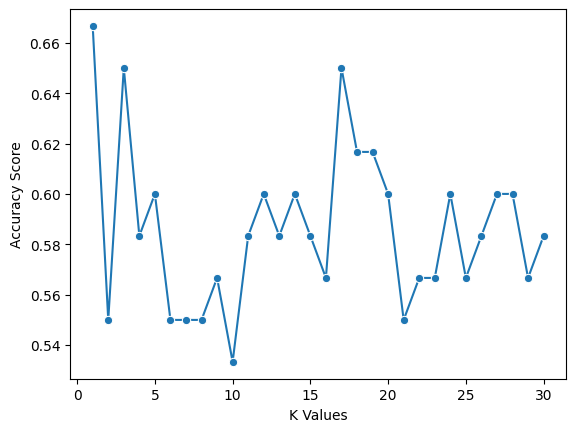

In [14]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [15]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [16]:
knnmodel = KNeighborsClassifier(n_neighbors=5) 

knnmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
print(len(X_train))
print(len(y_train))

30
30


In [18]:
y_pred_knn = knnmodel.predict(X_test)
y_pred_knn

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1])

In [19]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.68      0.81      0.74        16

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30



In [20]:
cnf_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_knn

array([[ 8,  6],
       [ 3, 13]])

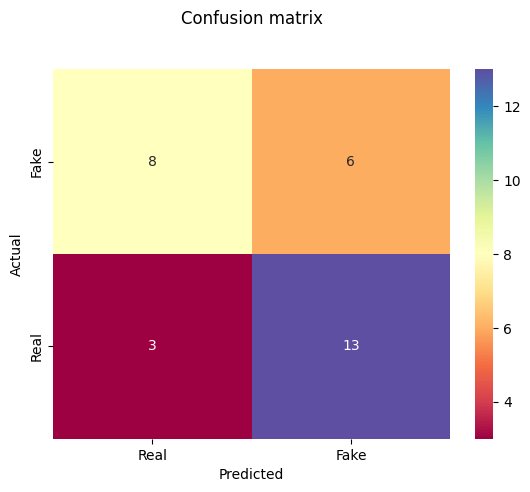

In [21]:
#Renders the Heatmap
sns.heatmap(cnf_knn, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Fake', 'Real'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

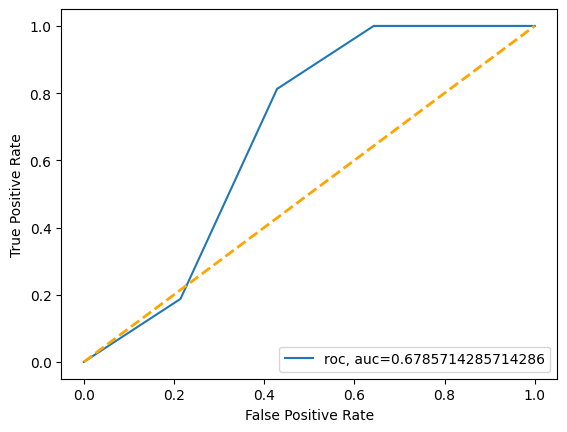

In [22]:
y_pred_proba_knn = knnmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposrateknn, trueposrateknn, _ = metrics.roc_curve(y_test,  y_pred_proba_knn) #Gets the false positive rate and true positive rate
aucknn = metrics.roc_auc_score(y_test, y_pred_proba_knn) #Calculates AUC score
plt.plot(falseposrateknn,trueposrateknn,label="roc, auc="+str(aucknn)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')#Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Conclusion for K-Nearest Neighbor

*The K-Nearest Neighbor model yield an accuracy of 0.7 with and f1-score of 0.64 for real audios and 0.74 for fake audios and an ACU value of 0.67. This shows that this model can dectect the AI generated audios moderately well.*

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 42)

In [24]:
dtc = dtc.fit(X_train,y_train)

In [25]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1])

In [26]:
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_dtc))

Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.71      0.75      0.73        16

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30



In [27]:
cnf_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cnf_dtc

array([[ 9,  5],
       [ 4, 12]])

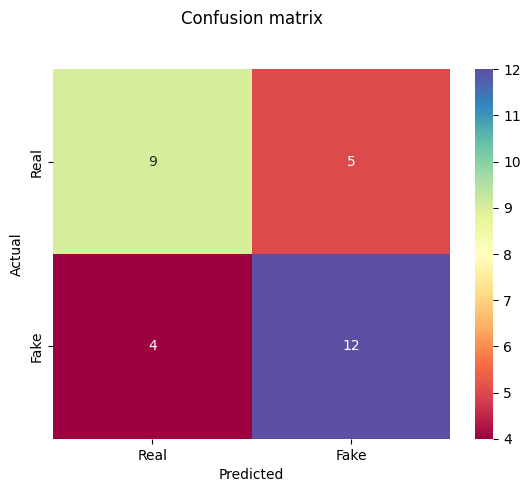

In [28]:
sns.heatmap(cnf_dtc, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

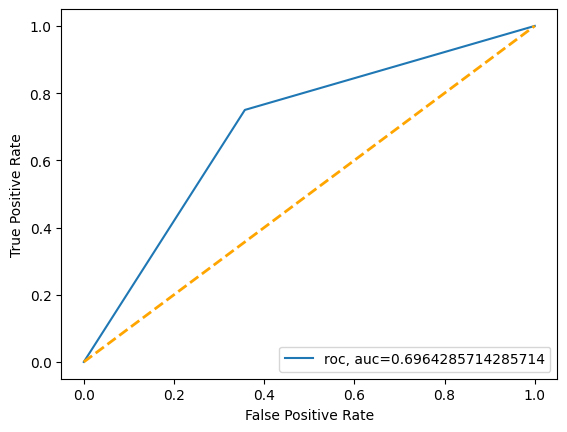

In [29]:
y_pred_proba_dtc = dtc.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposratedtc, trueposratedtc, _ = metrics.roc_curve(y_test,  y_pred_proba_dtc) #Gets the false positive rate and true positive rate
aucdtc = metrics.roc_auc_score(y_test, y_pred_proba_dtc) #Calculates AUC score
plt.plot(falseposratedtc,trueposratedtc,label="roc, auc="+str(aucdtc)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--') #Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

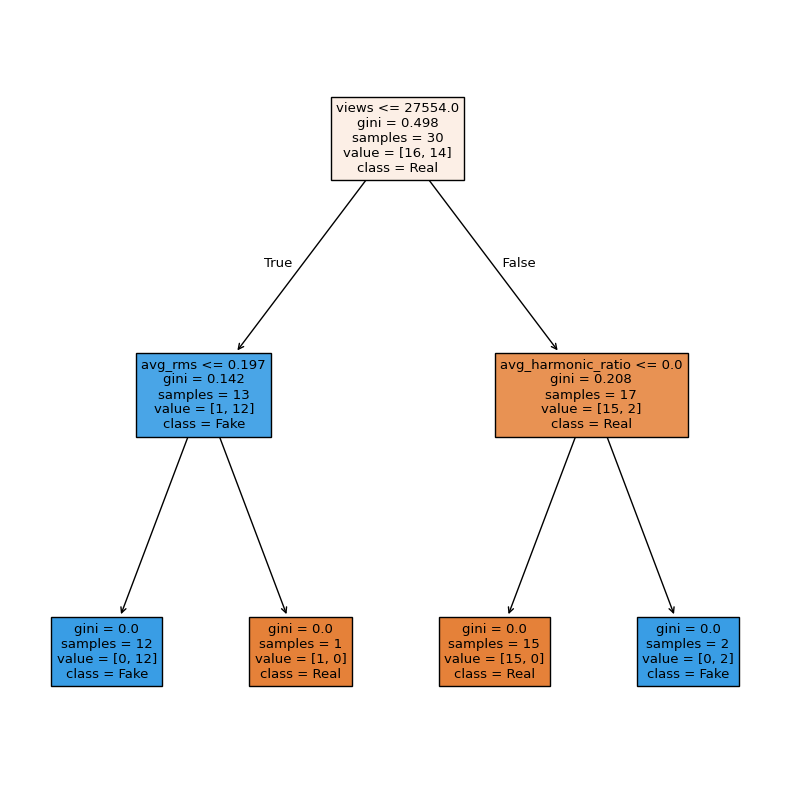

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10, 10))

tree.plot_tree(dtc, class_names=["Real","Fake"], feature_names=feat_col,filled=True, max_depth=3)
plt.savefig('dtc.png')
plt.show() 


### Conclusion for Decision Tree

*The Decision Tree model yield an accuracy of 0.7 with and f1-score of 0.67 for real audios and 0.73 for fake audios and an ACU value of 0.694. This shows that this model can dectect the AI generated audios just as well as the K-Nearest Neighbor model but not as well as the Logistic Regression model.*

# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

nbmodel = GaussianNB()
nbmodel.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred_nb = nbmodel.predict(X_test)
y_pred_nb

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1])

In [33]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.68      0.94      0.79        16

    accuracy                           0.73        30
   macro avg       0.78      0.72      0.71        30
weighted avg       0.77      0.73      0.72        30



In [34]:
cnf_nb = metrics.confusion_matrix(y_test, y_pred_nb)
cnf_nb

array([[ 7,  7],
       [ 1, 15]])

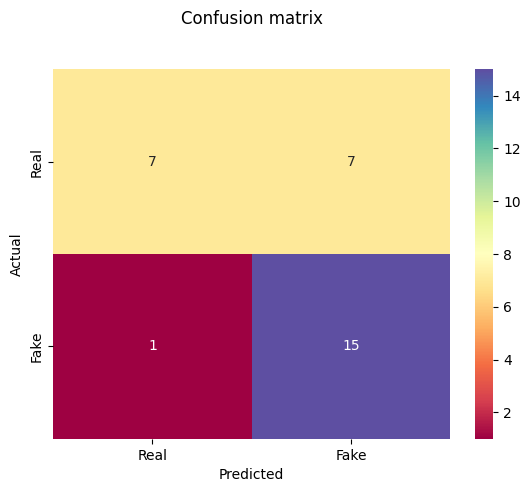

In [35]:
sns.heatmap(cnf_nb, annot=True, fmt='d', cmap=sns.color_palette("Spectral", as_cmap=True),xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion matrix', y=1.1) #Sets the title, location and distance
plt.xlabel('Predicted') #Labels the X axis as Actual
plt.ylabel('Actual') #Labels the Y axis as Predicted
plt.show()

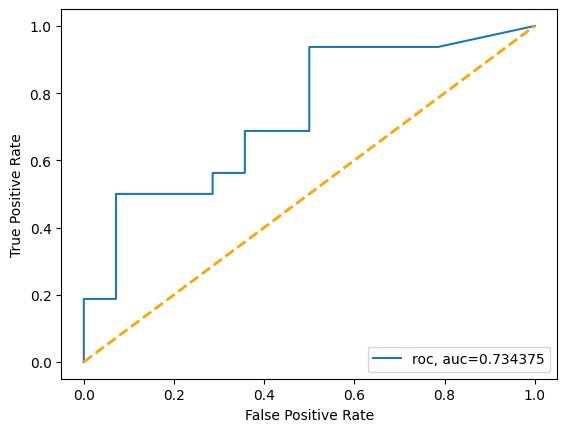

In [36]:
y_pred_proba_nb = nbmodel.predict_proba(X_test)[::,1] #Calculates the probability of positive class 1
falseposratenb, trueposratenb, _ = metrics.roc_curve(y_test,  y_pred_proba_nb) #Gets the false positive rate and true positive rate
aucnb = metrics.roc_auc_score(y_test, y_pred_proba_nb) #Calculates AUC score
plt.plot(falseposratenb,trueposratenb,label="roc, auc="+str(aucnb)) #Plots the false postive rate and true positive rate
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--') #Shows diagonal line 
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Conclusion for Naive Bayes

*The Naive Bayes model yield an accuracy of 0.733 with and f1-score of 0.64 for real audios and 0.79 for fake audios and an ACU value of 0.734. This shows that this model can dectect the AI generated audios better than the K-Nearest Neighbor model and Decision Tree model but not as well as the Logistic Regression model.*

# Baseline

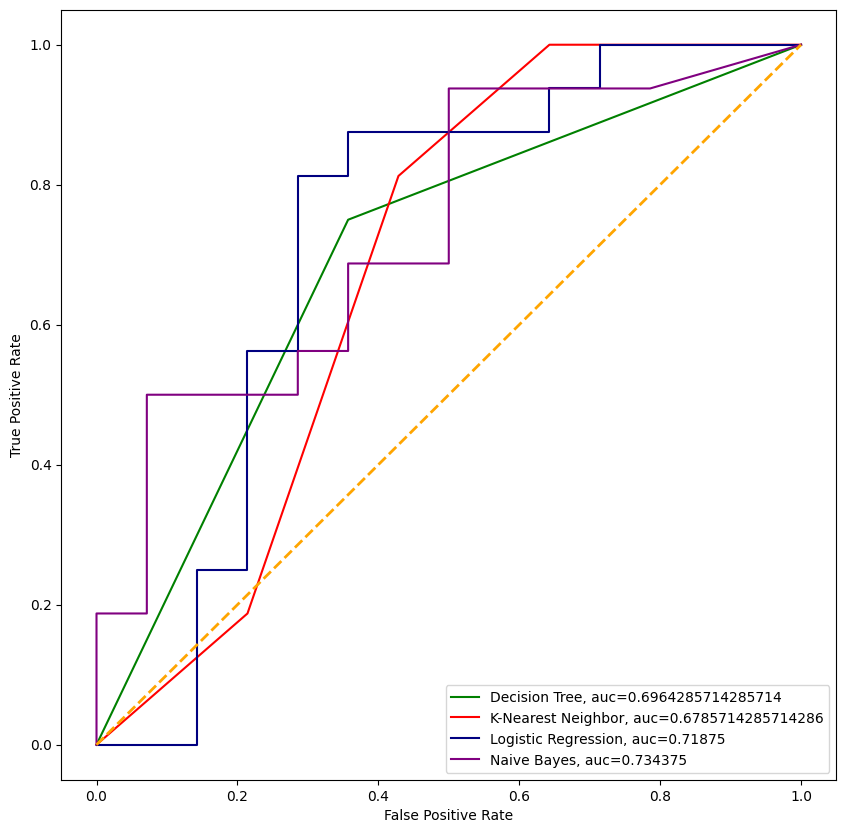

In [37]:
plt.figure(figsize=(10, 10))
plt.plot(falseposratedtc,trueposratedtc,color='green',label="Decision Tree, auc="+str(aucdtc))
plt.plot(falseposrateknn,trueposrateknn,color='red',label="K-Nearest Neighbor, auc="+str(aucknn))
plt.plot(falseposratelr,trueposratelr,color='navy',label="Logistic Regression, auc="+str(auclr))
plt.plot(falseposratenb,trueposratenb,color='purple',label="Naive Bayes, auc="+str(aucnb))
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.legend(loc=4) #Sets location of the legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('modelroc.png')
plt.show()

# Model Table

| Model                 | Accuracy | AUC  |    | Precision | Recall | F1-Score |
|:---------------------:|:--------:|:----:|:--:|:---------:|:------:|:--------:|
| Logistic regression   | 0.766    | 0.719| 0  | 0.77      | 0.71   | 0.74     |
|                       |          |      |----|-----------|--------|----------| 
|                       |          |      | 1  | 0.76      | 0.81   | 0.79     |
|-----------------------|----------|------|----|-----------|--------|----------|
|   K-Nearest Neighbor  | 0.7      | 0.679| 0  | 0.73      | 0.57   | 0.64     |
|                       |          |      |----|-----------|--------|----------| 
|                       |          |      | 1  | 0.68      | 0.81   | 0.74     |
|-----------------------|----------|------|----|-----------|--------|----------|
|   Decision Tree       | 0.7      | 0.684| 0  | 0.69      | 0.64   | 0.67     |
|                       |          |      |----|-----------|--------|----------| 
|                       |          |      | 1  | 0.71      | 0.75   | 0.73     |
|-----------------------|----------|------|----|-----------|--------|----------|
| Naive Bayes           | 0.733    | 0.734| 0  | 0.88      | 0.50   | 0.64     |
|                       |          |      |----|-----------|--------|----------| 
|                       |          |      | 1  | 0.68      | 0.94   | 0.79     |
|-----------------------|----------|------|----|-----------|--------|----------|

##### NB: 
*Some values may be rounded up to the third decimal place.*

# Cleaning and Balancing the Data

| Percentage Removed | Balancing Algorithms      |
|:------------------:|:-------------------------:|
| 14.79              | Exploratory Data Analysis |
|--------------------|---------------------------|
| 11.68              | Smote                     |
|--------------------|---------------------------|

*60 BiliBili links were extracted from the original Singfake dataset, these links were taken from a version of the Singfake dataset that had already been cleaned and balanced using EDA and Smote. The 60 links were chosen through randomized resampling.*

## Conclusion

*In conclusion, the Logistic Regression model performed the best with the Bilibili audio dataset with an accuracy of 0.766. The model that performed the worst with the dataset is the K-nearest Neighbor model with an accuracy of 0.7 and and AUC score of 0.679. The cause of the moderate accuracies for this dataset can be due to the dataset being of a small size of only 60 samples.*